# Tutorial MY-TGAN

## Time-series Generative Adversarial Networks

This tutorial shows how to use TGAN to generate synthetic time-series data. We are using Google Stock and Sine dataset as examples.

Experiment Settings (Import necessary packages and functions)

In [30]:

#%% Functions
# 1. Models
from my_tgan import tgan
import numpy as np
import sys
import pandas as pd
# 2. Data Loading
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    nmax=np.max(data, 0)
    nmin=np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7),nmax,nmin
def data_loading (seq_length):

    # Load Google Data
    x = pd.read_csv('data\IC_CFE.csv')
    x = x.dropna(axis=0,how='all') 
    x = np.array(x)
    # Flip the data to make chronological data
    x = x[::-1]
    # Min-Max Normalizer
    x,nmax,nmin = MinMaxScaler(x)
    
    # Build dataset
    dataX = []
    
    # Cut data by sequence length
    for i in range(0, len(x) - seq_length):
        _x = x[i:i + seq_length]
        dataX.append(_x)
        
    # Mix Data (to make it similar to i.i.d)
    idx = np.random.permutation(len(dataX))
    
    outputX = []
    for i in range(len(dataX)):
        outputX.append(dataX[idx[i]])
    
    return outputX,nmax,nmin


# 3. Metrics
sys.path.append('metrics')
from discriminative_score_metrics import discriminative_score_metrics
from visualization_metrics import PCA_Analysis, tSNE_Analysis
from predictive_score_metrics import predictive_score_metrics

print('Finish importing necessary packages and functions')

ModuleNotFoundError: No module named 'my_tgan'

Set main parameters and datasets

In [84]:
#%% Main Parameters
Iteration = 1
Sub_Iteration = 10

seq_length = 30
dataX,nmax,nmin = data_loading(seq_length)
data_name='IC.CFE'
print(data_name + ' dataset is ready.')


IC.CFE dataset is ready.


Set network parameters & Output initialization

In [3]:
#%% Newtork Parameters
parameters = dict()

parameters['hidden_dim'] = len(dataX[0][0,:]) * 4
parameters['num_layers'] = 3
parameters['iterations'] = 20000
parameters['batch_size'] = 128
parameters['module_name'] = 'gru'   # Other options: 'lstm' or 'lstmLN'
parameters['z_dim'] = len(dataX[0][0,:]) 

#%% Experiments
# Output Initialization
Discriminative_Score = list()
Predictive_Score = list()

In [4]:
import warnings
warnings.filterwarnings("ignore")

Run TGAN & Evaluate discriminative and predictive scores

Start iterations




Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/201809

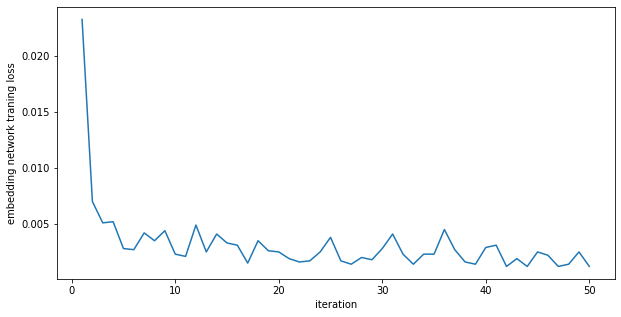

Start Training with Supervised Loss Only
step: 1000, s_loss: 0.0167
step: 2000, s_loss: 0.0096
step: 3000, s_loss: 0.0076
step: 4000, s_loss: 0.0051
step: 5000, s_loss: 0.0044
step: 6000, s_loss: 0.0032
step: 7000, s_loss: 0.003
step: 8000, s_loss: 0.0026
step: 9000, s_loss: 0.0026
step: 10000, s_loss: 0.0024
step: 11000, s_loss: 0.0025
step: 12000, s_loss: 0.0021
step: 13000, s_loss: 0.0019
step: 14000, s_loss: 0.0019
step: 15000, s_loss: 0.0019
step: 16000, s_loss: 0.002
step: 17000, s_loss: 0.0018
step: 18000, s_loss: 0.0019
step: 19000, s_loss: 0.002
step: 20000, s_loss: 0.0017
step: 21000, s_loss: 0.0019
step: 22000, s_loss: 0.0019
step: 23000, s_loss: 0.0017
step: 24000, s_loss: 0.0015
step: 25000, s_loss: 0.0015
step: 26000, s_loss: 0.0015
step: 27000, s_loss: 0.0015
step: 28000, s_loss: 0.0014
step: 29000, s_loss: 0.0015
step: 30000, s_loss: 0.0014
step: 31000, s_loss: 0.0014
step: 32000, s_loss: 0.0012
step: 33000, s_loss: 0.0013
step: 34000, s_loss: 0.0012
step: 35000, s_loss

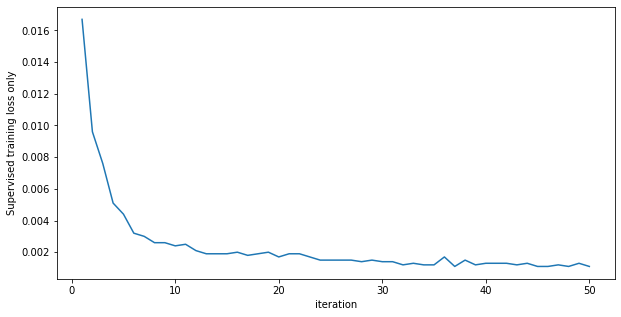

Start Joint Training
step: 1000, d_loss: 1.2961, g_loss_u: 1.5002, g_loss_s: 0.0178, g_loss_v: 0.0402, e_loss_t0: 0.0025
step: 2000, d_loss: 1.5194, g_loss_u: 1.4491, g_loss_s: 0.0104, g_loss_v: 0.0594, e_loss_t0: 0.0015
step: 3000, d_loss: 1.4109, g_loss_u: 1.4917, g_loss_s: 0.0087, g_loss_v: 0.0139, e_loss_t0: 0.001
step: 4000, d_loss: 1.2892, g_loss_u: 1.2785, g_loss_s: 0.0082, g_loss_v: 0.0133, e_loss_t0: 0.0016
step: 5000, d_loss: 1.5069, g_loss_u: 1.6945, g_loss_s: 0.0063, g_loss_v: 0.0314, e_loss_t0: 0.0015
step: 6000, d_loss: 1.4091, g_loss_u: 1.4623, g_loss_s: 0.0074, g_loss_v: 0.0181, e_loss_t0: 0.0011
step: 7000, d_loss: 1.4136, g_loss_u: 1.4611, g_loss_s: 0.0082, g_loss_v: 0.0386, e_loss_t0: 0.0015
step: 8000, d_loss: 1.4582, g_loss_u: 1.1176, g_loss_s: 0.0084, g_loss_v: 0.0568, e_loss_t0: 0.0014
step: 9000, d_loss: 1.533, g_loss_u: 1.2079, g_loss_s: 0.0044, g_loss_v: 0.0474, e_loss_t0: 0.0017
step: 10000, d_loss: 1.5659, g_loss_u: 1.3432, g_loss_s: 0.0048, g_loss_v: 0.0654

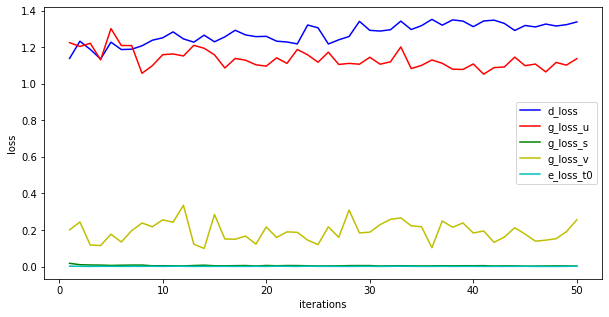

Finish Synthetic Data Generation
Instructions for updating:
Please use tf.global_variables instead.

Finish TGAN iterations


In [5]:

print('Start iterations') 
    
# Each Iteration
for it in range(Iteration):

    # Synthetic Data Generation
    dataX_hat = tgan(dataX, parameters)   
      
    print('Finish Synthetic Data Generation')

    #%% Performance Metrics
    
    # 1. Discriminative Score
    Acc = list()
    for tt in range(Sub_Iteration):
        Temp_Disc = discriminative_score_metrics (dataX, dataX_hat)
        Acc.append(Temp_Disc)
    
    Discriminative_Score.append(np.mean(Acc))
    
    # 2. Predictive Performance
    MAE_All = list()
    for tt in range(Sub_Iteration):
        MAE_All.append(predictive_score_metrics (dataX, dataX_hat))
        
    Predictive_Score.append(np.mean(MAE_All))       
    
print('Finish TGAN iterations')

Visualization (PCA Analysis)

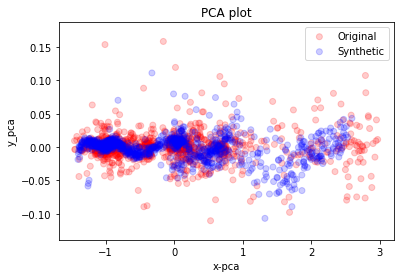

In [6]:
PCA_Analysis (dataX, dataX_hat)

Visualization (t-SNE Analysis)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.030s...
[t-SNE] Computed neighbors for 2000 samples in 0.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.018808
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.044952
[t-SNE] KL divergence after 300 iterations: 0.529894


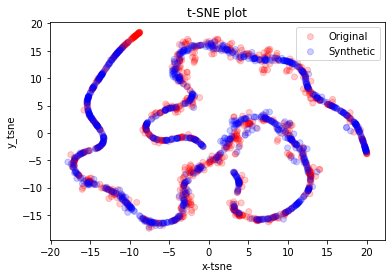

In [7]:
tSNE_Analysis (dataX, dataX_hat)

Print Discriminative and Predictive Scores

In [8]:
# Print Results
print('Discriminative Score - Mean: ' + str(np.round(np.mean(Discriminative_Score),4)) + ', Std: ' + str(np.round(np.std(Discriminative_Score),4)))
print('Predictive Score - Mean: ' + str(np.round(np.mean(Predictive_Score),4)) + ', Std: ' + str(np.round(np.std(Predictive_Score),4)))


Discriminative Score - Mean: 0.0325, Std: 0.0
Predictive Score - Mean: 0.0475, Std: 0.0


In [94]:
#data=dataX_hat[0]
#for i in range(len(dataX_hat)-1):
#    temp=dataX_hat[i+1]
#    data=np.row_stack((data,dataX_hat[i]))

def recode_data(normdata,nmax,nmin):
    data=normdata*(nmax-nmin+1e-7)+nmin
    return data

data=[]
for i in range(len(dataX_hat)):
    temp=dataX_hat[i].tolist()
    data.extend(temp)


In [95]:
data=np.array(data)
data=recode_data(data,nmax,nmin)
data=pd.DataFrame(data)
data.to_csv('F:/Courses/HKUST_Semester_Spring/MAFS6100B_R2/ganpaper_with_code/timeserious_gan/model/alg/timegan/synthetic_IC_CFE.csv')

In [85]:
def recode_data(normdata,nmax,nmin):
    data=normdata*(nmax-nmin+1e-7)+nmin
    return data

array([[7.68100000e+03, 7.68100000e+03, 7.68100000e+03, 7.68100000e+03,
        1.90488800e+08],
       [7.68100000e+03, 7.68100000e+03, 7.52440000e+03, 7.58840000e+03,
        2.26001536e+09],
       [7.58920000e+03, 7.59240000e+03, 7.57260000e+03, 7.57460000e+03,
        9.42768600e+08],
       ...,
       [5.84220000e+03, 5.84800000e+03, 5.84220000e+03, 5.84440000e+03,
        1.57814640e+08],
       [5.84440000e+03, 5.85000000e+03, 5.84240000e+03, 5.85000000e+03,
        1.57807280e+08],
       [5.85000000e+03, 5.85000000e+03, 5.85000000e+03, 5.85000000e+03,
        0.00000000e+00]])

In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
data_syn=pd.read_csv('/Users/raysun/Desktop/timegan/synthetic_IC_CFE.csv')
data_real=pd.read_csv('/Users/raysun/Desktop/timegan/data/IC.CFE.csv')

In [15]:
data_real.Time

0        2015-04-16 09:14:00.005000
1        2015-04-16 09:15:00.004997
2        2015-04-16 09:16:00.005003
3        2015-04-16 09:17:00.005000
4        2015-04-16 09:18:00.004996
                    ...            
68267    2016-04-22 15:11:00.005001
68268    2016-04-22 15:12:00.004998
68269    2016-04-22 15:13:00.005004
68270    2016-04-22 15:14:00.005000
68271    2016-04-22 15:15:00.004997
Name: Time, Length: 68272, dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

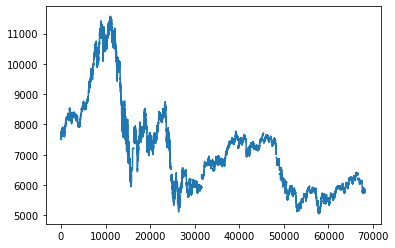

In [16]:
plt.plot(data_real.close)
plt.show

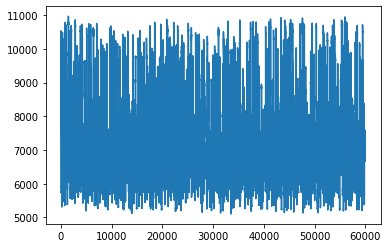

In [32]:
plt.plot(data_syn.Close.iloc[0:60000])
plt.show()